In [1]:
from sklearn.model_selection import train_test_split
import pandas_datareader as pdr
import pandas as pd
import yfinance as yf
import numpy as np

snp = yf.Ticker("^GSPC").history('5y', actions=False)

snp["Daily"] = (1 - (snp["Open"] / snp["Close"]))*100
snp["Volatility"] = (1 - (snp["Low"] / snp["High"]))
snp = snp.drop(["High", "Low", "Open", "Close"], axis="columns")
df = snp["Daily"]

snp["Lag1"] = df.shift(1, fill_value=0)
snp["Lag2"] = df.shift(2, fill_value=0)
snp["Lag3"] = df.shift(3, fill_value=0)
snp["Lag4"] = df.shift(4, fill_value=0)
snp["Lag5"] = df.shift(5, fill_value=0)


In [2]:
import datetime
import pytz
split = datetime.datetime(2022, 1, 1, 0, 0, tzinfo=pytz.timezone("America/New_York"))
train = snp[snp.index <= split]
test = snp[snp.index > split]

X_train, y_train = train.drop(["Daily"], axis="columns"), np.sign(train["Daily"])

X_test, y_test = test.drop(["Daily"], axis="columns"), np.sign(test["Daily"])

X_train = X_train[5:]
y_train = y_train[5:]

              precision    recall  f1-score   support

        -1.0       0.55      0.08      0.14       264
         1.0       0.53      0.94      0.68       288

    accuracy                           0.53       552
   macro avg       0.54      0.51      0.41       552
weighted avg       0.54      0.53      0.42       552



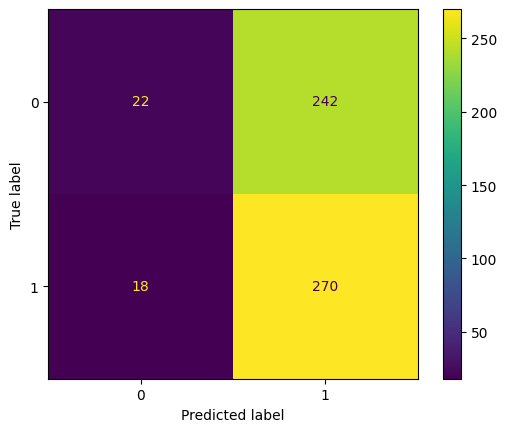

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


              precision    recall  f1-score   support

        -1.0       0.53      0.50      0.51       264
         1.0       0.56      0.60      0.58       288

    accuracy                           0.55       552
   macro avg       0.55      0.55      0.55       552
weighted avg       0.55      0.55      0.55       552



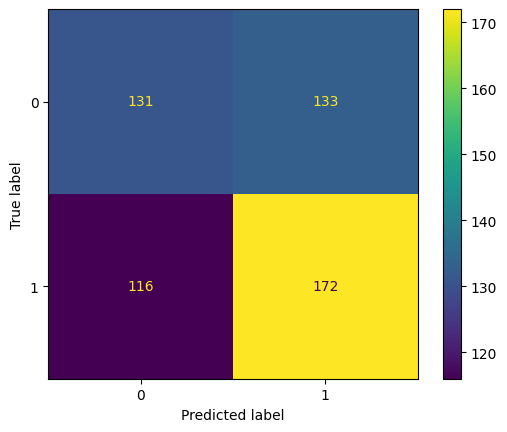

In [4]:
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import MinMaxScaler
model = ComplementNB()

scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
model.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

              precision    recall  f1-score   support

        -1.0       0.42      0.10      0.16       264
         1.0       0.51      0.87      0.65       288

    accuracy                           0.50       552
   macro avg       0.46      0.49      0.40       552
weighted avg       0.47      0.50      0.42       552



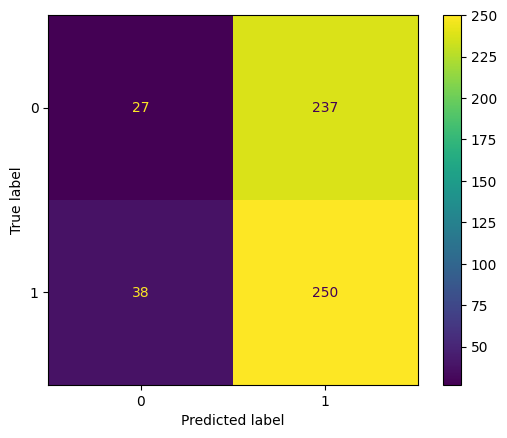

In [5]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
model = BernoulliNB()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()